In [78]:
import matplotlib.pyplot as plt
import pandas as pd

In [82]:
df = pd.read_csv("combined_results.csv")

In [30]:
df.sample(10)

,framework,measurer,prompt_size,output_size,iterations,average,max,min,std,gpu_usage
47,baseline,ttft,191,none,10.0,1.216016,1.819011,1.139299,4.042240e-02,4.750290870666504
57,baseline,tpot,17,512,10.0,1.059560,1.061738,1.058599,9.350633e-07,4.868458271026611
13,exllama,throughput,17,512,10.0,48.633214,48.867356,48.055244,6.735832e-02,8.774086475372314
23,vllm,tpot,17,128,10.0,0.018659,0.018738,0.018564,2.174374e-09,11.40824031829834
18,vllm,tpot,660,128,10.0,0.024172,0.024340,0.023973,1.757727e-08,11.466698169708252
41,together,throughput,17,none,10.0,86.109622,108.366696,71.302397,9.204669e+01,none
27,vllm,throughput,660,512,10.0,0.024207,0.024443,0.023732,3.731901e-08,11.466698169708252
15,vllm,tpot,660,512,10.0,0.020553,0.020687,0.020463,5.622112e-09,11.466698169708252
33,together,ttft,660,none,10.0,1.431259,3.669091,0.312283,1.758082e+00,none
1,exllama,tpot,660,128,10.0,0.030428,0.030713,0.030134,4.057101e-08,8.774086475372314


In [4]:
colors = {"exllama": "blue", "vllm": "green", "together": "red", "baseline": "orange"}

In [5]:
df_ttft = df[df["measurer"] == "ttft"]
df_tpot = df[df["measurer"] == "tpot"]
df_throughput = df[df["measurer"] == "throughput"]

In [27]:
df_17 = df_ttft[df_ttft["prompt_size"] == 17]
df_191 = df_ttft[df_ttft["prompt_size"] == 191]
df_660 = df_ttft[df_ttft["prompt_size"] == 660]


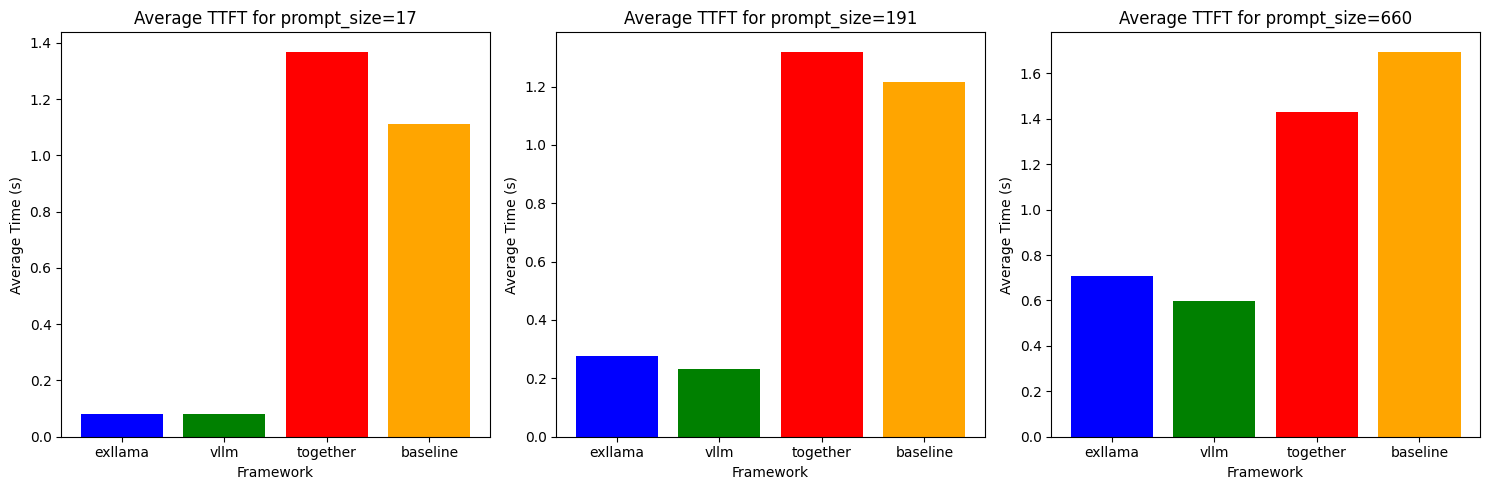

In [28]:

# Create bar graphs
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Bar graph for prompt_size=17
axs[0].bar(df_17["framework"], df_17["average"], color=[colors[x] for x in df_17["framework"]])
axs[0].set_title("Average TTFT for prompt_size=17")
axs[0].set_xlabel("Framework")
axs[0].set_ylabel("Average Time (s)")

# Bar graph for prompt_size=191
axs[1].bar(df_191["framework"], df_191["average"], color=[colors[x] for x in df_191["framework"]])
axs[1].set_title("Average TTFT for prompt_size=191")
axs[1].set_xlabel("Framework")
axs[1].set_ylabel("Average Time (s)")

# Bar graph for prompt_size=660
axs[2].bar(df_660["framework"], df_660["average"], color=[colors[x] for x in df_660["framework"]])
axs[2].set_title("Average TTFT for prompt_size=660")
axs[2].set_xlabel("Framework")
axs[2].set_ylabel("Average Time (s)")

plt.tight_layout()
plt.show()

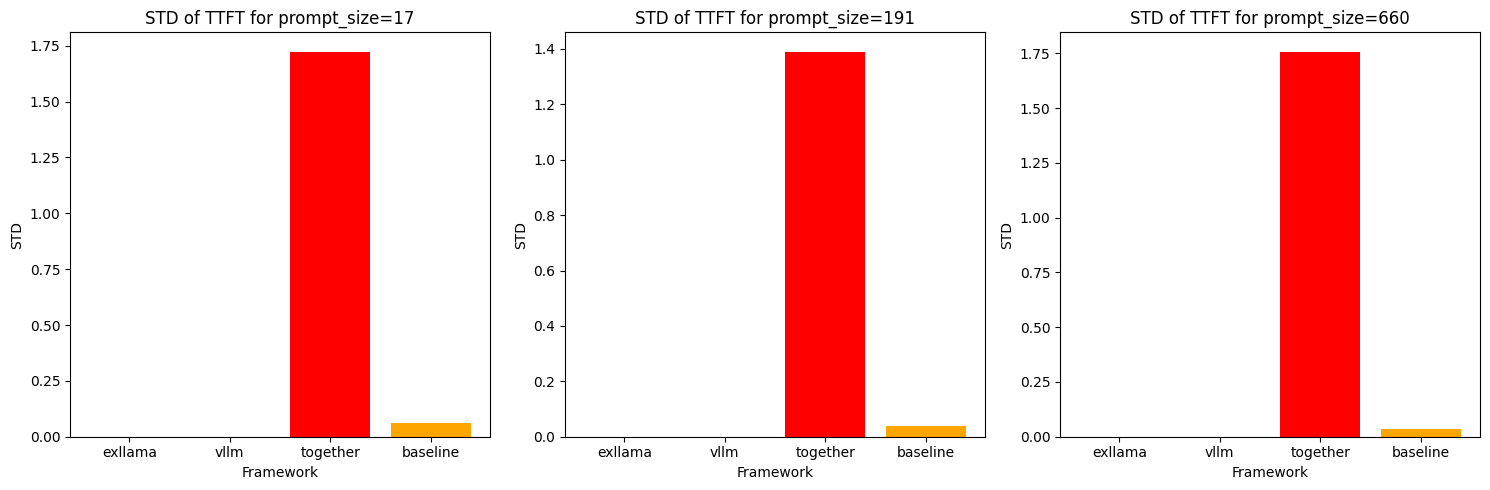

In [29]:
# Create bar graphs
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Bar graph for prompt_size=17
axs[0].bar(
    df_17["framework"], df_17["std"], color=[colors[x] for x in df_17["framework"]]
)
axs[0].set_title("STD of TTFT for prompt_size=17")
axs[0].set_xlabel("Framework")
axs[0].set_ylabel("STD")

# Bar graph for prompt_size=191
axs[1].bar(
    df_191["framework"],
    df_191["std"],
    color=[colors[x] for x in df_191["framework"]],
)
axs[1].set_title("STD of TTFT for prompt_size=191")
axs[1].set_xlabel("Framework")
axs[1].set_ylabel("STD")

# Bar graph for prompt_size=660
axs[2].bar(
    df_660["framework"],
    df_660["std"],
    color=[colors[x] for x in df_660["framework"]],
)
axs[2].set_title("STD of TTFT for prompt_size=660")
axs[2].set_xlabel("Framework")
axs[2].set_ylabel("STD")

plt.tight_layout()
plt.show()

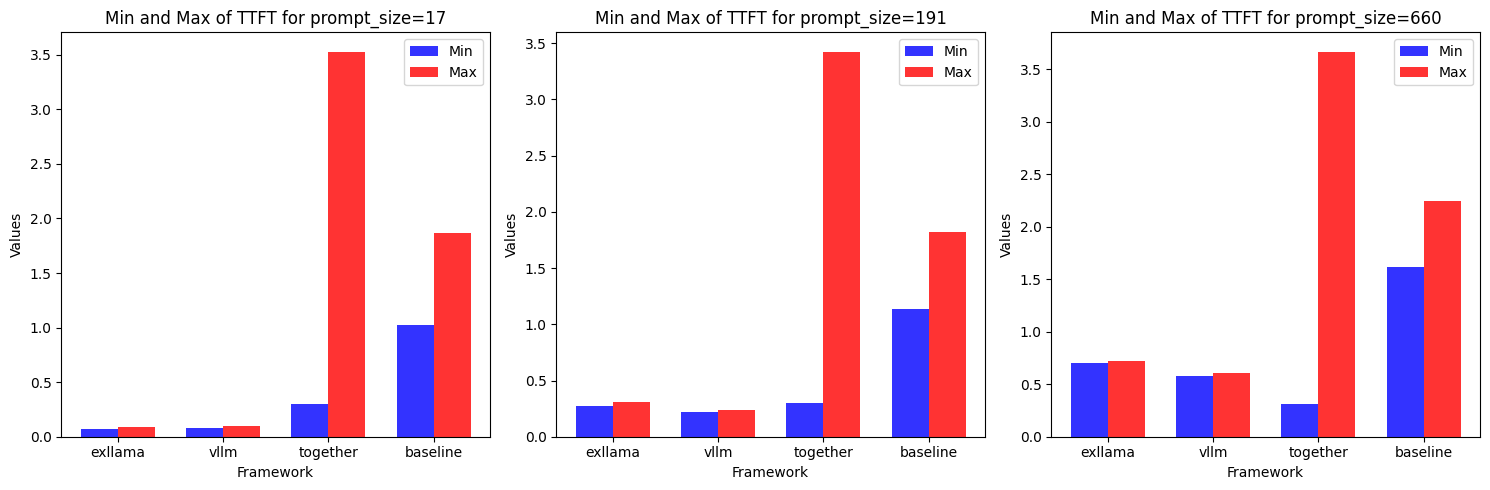

In [30]:
import numpy as np

# Create bar graphs
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
bar_width = 0.35
opacity = 0.8

# Bar graph for prompt_size=17
bar1 = axs[0].bar(np.arange(len(df_17["framework"])) - bar_width/2, df_17["min"], bar_width, alpha=opacity, color='b', label='Min')
bar2 = axs[0].bar(np.arange(len(df_17["framework"])) + bar_width/2, df_17["max"], bar_width, alpha=opacity, color='r', label='Max')
axs[0].set_title("Min and Max of TTFT for prompt_size=17")
axs[0].set_xlabel("Framework")
axs[0].set_ylabel("Values")
axs[0].set_xticks(np.arange(len(df_17["framework"])))
axs[0].set_xticklabels(df_17["framework"])
axs[0].legend()

# Bar graph for prompt_size=191
bar1 = axs[1].bar(np.arange(len(df_191["framework"])) - bar_width/2, df_191["min"], bar_width, alpha=opacity, color='b', label='Min')
bar2 = axs[1].bar(np.arange(len(df_191["framework"])) + bar_width/2, df_191["max"], bar_width, alpha=opacity, color='r', label='Max')
axs[1].set_title("Min and Max of TTFT for prompt_size=191")
axs[1].set_xlabel("Framework")
axs[1].set_ylabel("Values")
axs[1].set_xticks(np.arange(len(df_191["framework"])))
axs[1].set_xticklabels(df_191["framework"])
axs[1].legend()

# Bar graph for prompt_size=660
bar1 = axs[2].bar(np.arange(len(df_660["framework"])) - bar_width/2, df_660["min"], bar_width, alpha=opacity, color='b', label='Min')
bar2 = axs[2].bar(np.arange(len(df_660["framework"])) + bar_width/2, df_660["max"], bar_width, alpha=opacity, color='r', label='Max')
axs[2].set_title("Min and Max of TTFT for prompt_size=660")
axs[2].set_xlabel("Framework")
axs[2].set_ylabel("Values")
axs[2].set_xticks(np.arange(len(df_660["framework"])))
axs[2].set_xticklabels(df_660["framework"])
axs[2].legend()

plt.tight_layout()
plt.show()

In [63]:
df_17_128 = df_tpot[(df_tpot["prompt_size"] == 17) & (df_tpot["output_size"] == "128")]
df_191_128 = df_tpot[(df_tpot["prompt_size"] == 191) & (df_tpot["output_size"] == "128")]
df_660_128 = df_tpot[(df_tpot["prompt_size"] == 660) & (df_tpot["output_size"] == "128")]

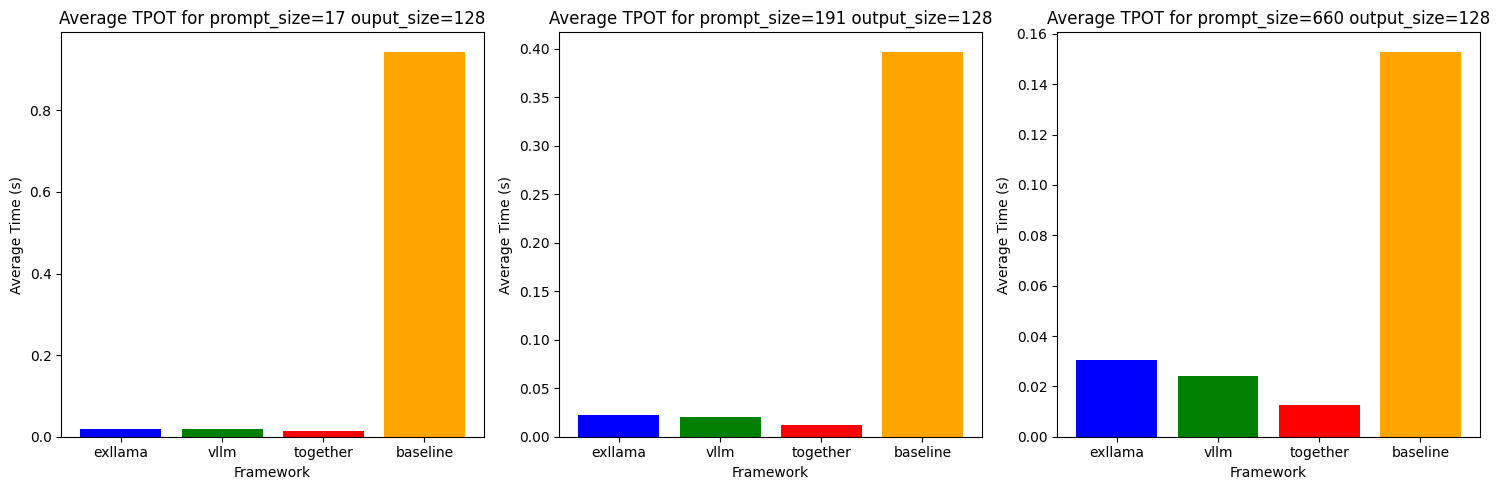

In [64]:
# Create bar graphs
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Bar graph for prompt_size=17
axs[0].bar(
    df_17_128["framework"], df_17_128["average"], color=[colors[x] for x in df_17_128["framework"]]
)
axs[0].set_title("Average TPOT for prompt_size=17 ouput_size=128")
axs[0].set_xlabel("Framework")
axs[0].set_ylabel("Average Time (s)")

# Bar graph for prompt_size=191
axs[1].bar(
    df_191_128["framework"],
    df_191_128["average"],
    color=[colors[x] for x in df_191_128["framework"]],
)
axs[1].set_title("Average TPOT for prompt_size=191 output_size=128")
axs[1].set_xlabel("Framework")
axs[1].set_ylabel("Average Time (s)")

# Bar graph for prompt_size=660
axs[2].bar(
    df_660_128["framework"],
    df_660_128["average"],
    color=[colors[x] for x in df_660_128["framework"]],
)
axs[2].set_title("Average TPOT for prompt_size=660 output_size=128")
axs[2].set_xlabel("Framework")
axs[2].set_ylabel("Average Time (s)")

plt.tight_layout()
plt.show()

In [66]:
df_17_128_no_baseline = df_tpot[(df_tpot["prompt_size"] == 17) & (df_tpot["output_size"] == "128") & (df_tpot["framework"] != "baseline")]
df_191_128_no_baseline = df_tpot[(df_tpot["prompt_size"] == 191) & (df_tpot["output_size"] == "128") & (df_tpot["framework"] != "baseline")]
df_660_128_no_baseline = df_tpot[(df_tpot["prompt_size"] == 660) & (df_tpot["output_size"] == "128") & (df_tpot["framework"] != "baseline")]

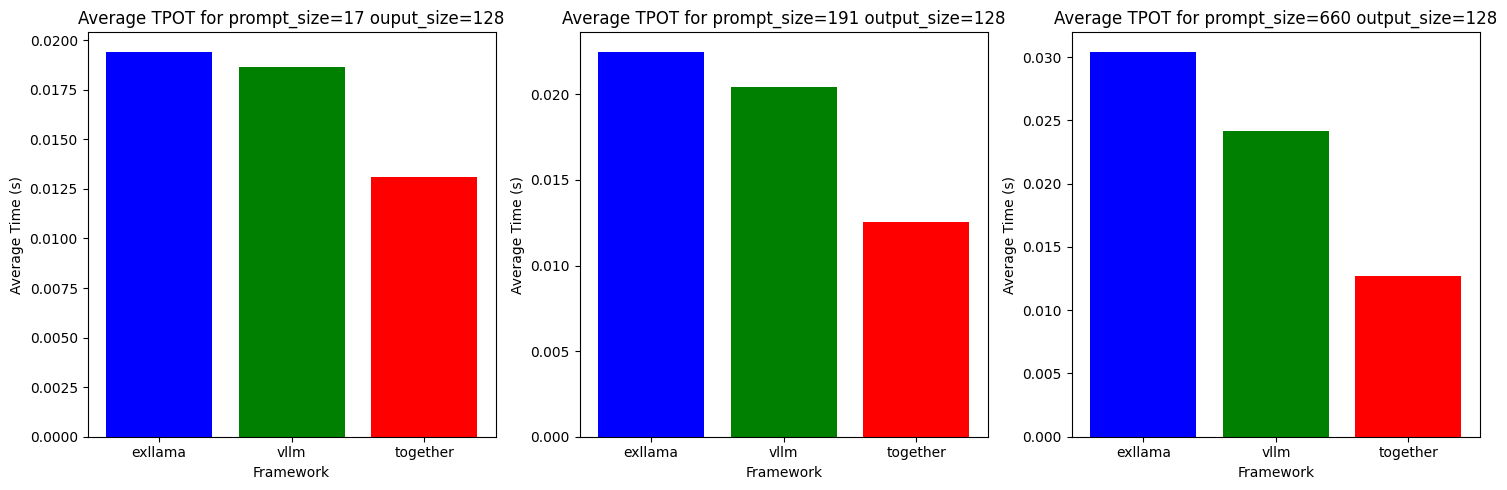

In [67]:
# Create bar graphs
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Bar graph for prompt_size=17
axs[0].bar(
    df_17_128_no_baseline["framework"],
    df_17_128_no_baseline["average"],
    color=[colors[x] for x in df_17_128_no_baseline["framework"]],
)
axs[0].set_title("Average TPOT for prompt_size=17 ouput_size=128")
axs[0].set_xlabel("Framework")
axs[0].set_ylabel("Average Time (s)")

# Bar graph for prompt_size=191
axs[1].bar(
    df_191_128_no_baseline["framework"],
    df_191_128_no_baseline["average"],
    color=[colors[x] for x in df_191_128_no_baseline["framework"]],
)
axs[1].set_title("Average TPOT for prompt_size=191 output_size=128")
axs[1].set_xlabel("Framework")
axs[1].set_ylabel("Average Time (s)")

# Bar graph for prompt_size=660
axs[2].bar(
    df_660_128_no_baseline["framework"],
    df_660_128_no_baseline["average"],
    color=[colors[x] for x in df_660_128_no_baseline["framework"]],
)
axs[2].set_title("Average TPOT for prompt_size=660 output_size=128")
axs[2].set_xlabel("Framework")
axs[2].set_ylabel("Average Time (s)")

plt.tight_layout()
plt.show()

In [60]:
df_17_512 = df_tpot[(df_tpot["prompt_size"] == 17) & (df_tpot["output_size"] == "512")]
df_191_512 = df_tpot[
    (df_tpot["prompt_size"] == 191) & (df_tpot["output_size"] == "512")
]
df_660_512 = df_tpot[
    (df_tpot["prompt_size"] == 660) & (df_tpot["output_size"] == "512")
]

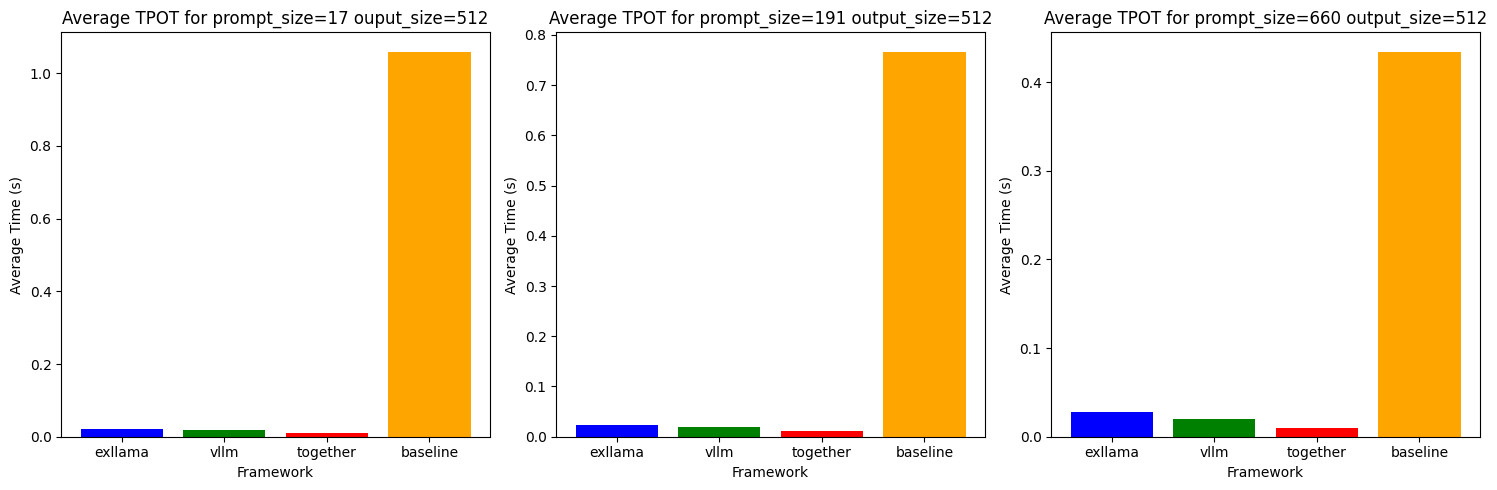

In [69]:
# Create bar graphs
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Bar graph for prompt_size=17
axs[0].bar(
    df_17_512["framework"],
    df_17_512["average"],
    color=[colors[x] for x in df_17_512["framework"]],
)
axs[0].set_title("Average TPOT for prompt_size=17 ouput_size=512")
axs[0].set_xlabel("Framework")
axs[0].set_ylabel("Average Time (s)")

# Bar graph for prompt_size=191
axs[1].bar(
    df_191_512["framework"],
    df_191_512["average"],
    color=[colors[x] for x in df_191_512["framework"]],
)
axs[1].set_title("Average TPOT for prompt_size=191 output_size=512")
axs[1].set_xlabel("Framework")
axs[1].set_ylabel("Average Time (s)")

# Bar graph for prompt_size=660
axs[2].bar(
    df_660_512["framework"],
    df_660_512["average"],
    color=[colors[x] for x in df_660_512["framework"]],
)
axs[2].set_title("Average TPOT for prompt_size=660 output_size=512")
axs[2].set_xlabel("Framework")
axs[2].set_ylabel("Average Time (s)")

plt.tight_layout()
plt.show()

In [87]:
df_gpu = df.replace("none", 0)


In [89]:
df_gpu["gpu_usage"] = df_gpu["gpu_usage"].astype(float)

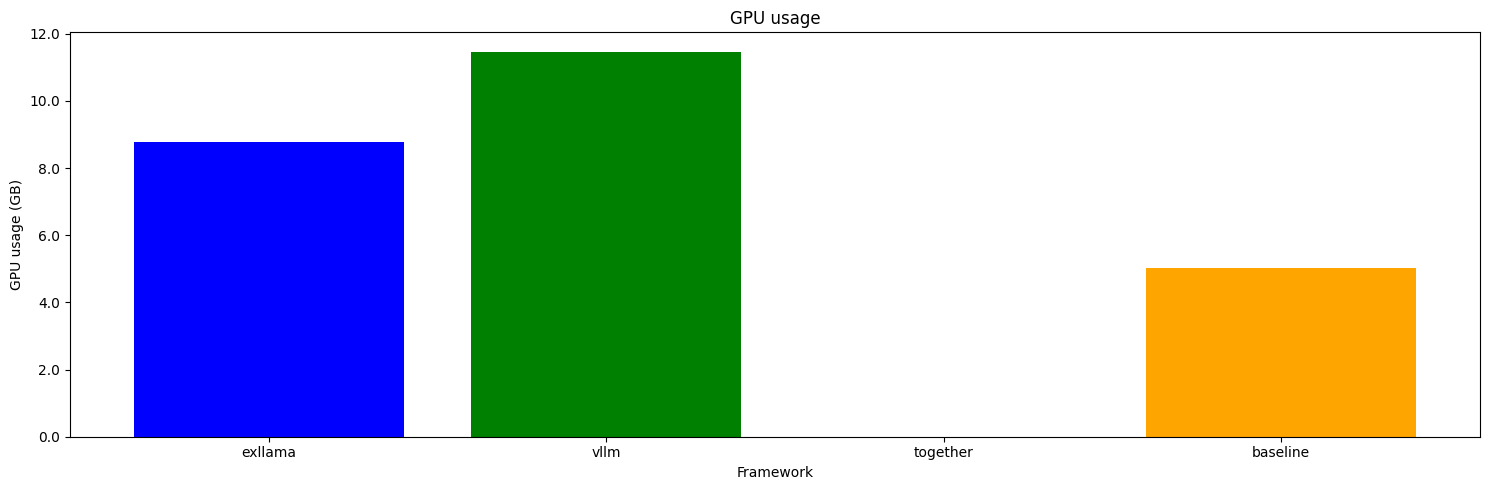

In [91]:
# Create bar graphs
fig, axs = plt.subplots(figsize=(15, 5))

axs.bar(
    df_gpu["framework"], df_gpu["gpu_usage"], color=[colors[x] for x in df_gpu["framework"]]
)
axs.set_title("GPU usage")
axs.set_xlabel("Framework")

axs.set_ylabel("GPU usage (GB)")


plt.tight_layout()
plt.show()